In [178]:
import logging
logging.basicConfig(filename="14AprInfo.log", level=logging.INFO, format="%(asctime)s %(name)s %(message)s")

In [179]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df=pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [181]:
df.isnull().sum()
# no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: >

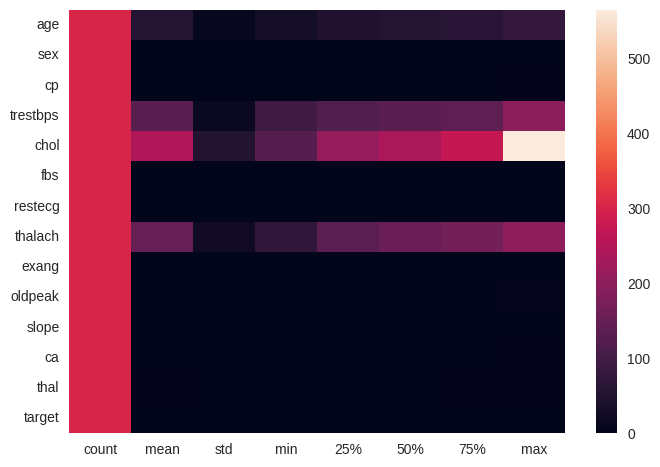

In [183]:
sns.heatmap(df.describe().T)

In [184]:
df['target'].unique()

array([1, 0])

In [185]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [186]:
df.info()
# all numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

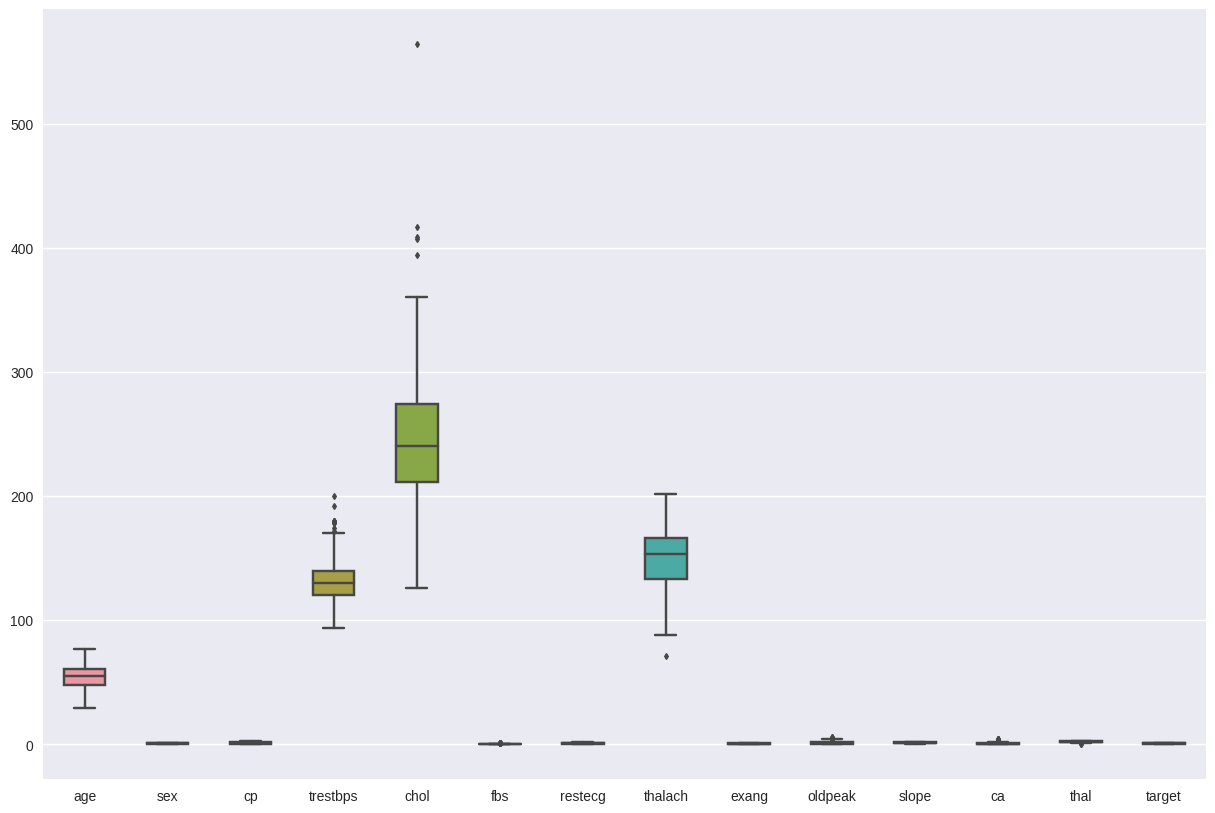

In [187]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [188]:
#  removing outliers
for col in df.columns[:-1]:
    # Calculate the IQR of the column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

<Axes: >

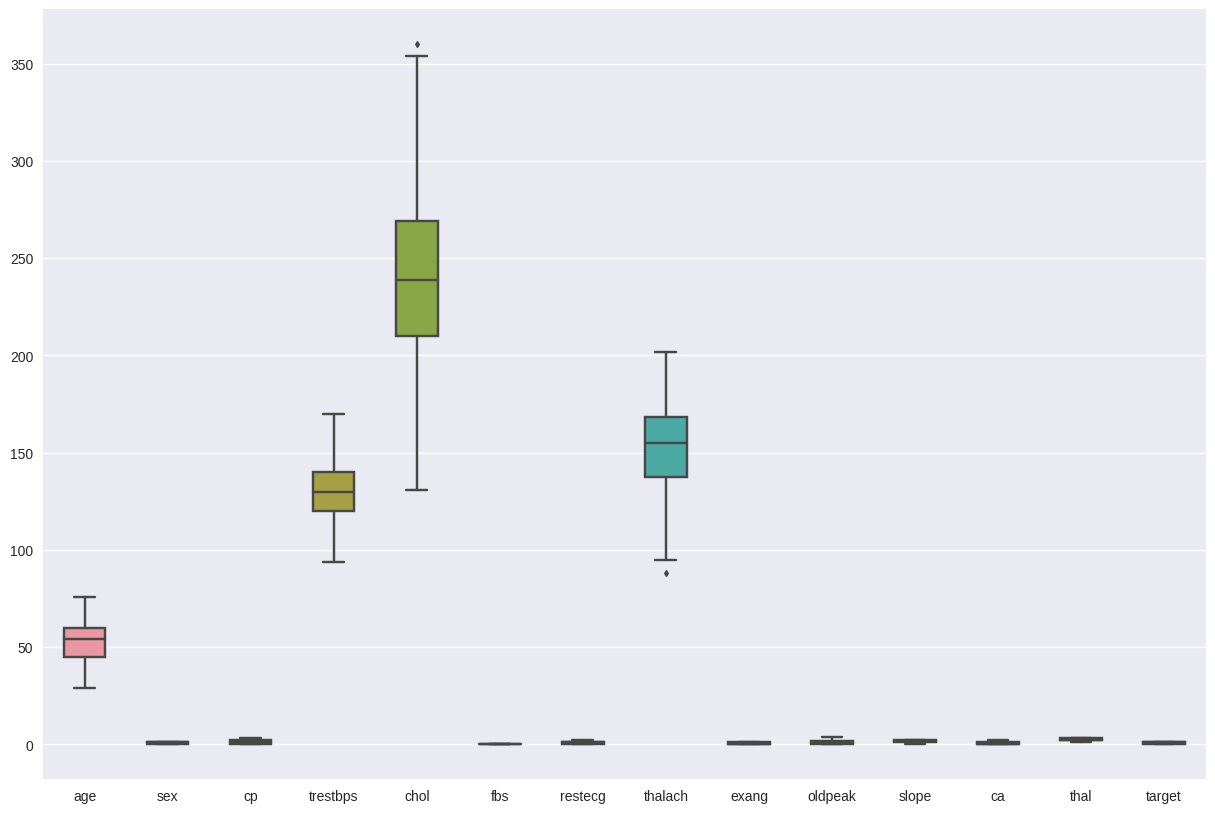

In [189]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [190]:
# sns.pairplot(df,hue='target')

In [191]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.088839,-0.078448,0.266698,0.172527,NaN,-0.082927,-0.413016,0.123981,0.219390,-0.161019,0.391099,0.124380,-0.215120
sex,-0.088839,1.000000,-0.121648,-0.001433,-0.093058,NaN,-0.116956,-0.086734,0.208950,0.178690,-0.009104,0.099091,0.274262,-0.363483
cp,-0.078448,-0.121648,1.000000,0.083476,-0.047258,NaN,0.076362,0.277964,-0.351256,-0.108435,0.101887,-0.196373,-0.153325,0.371115
trestbps,0.266698,-0.001433,0.083476,1.000000,0.126974,NaN,-0.110594,-0.026792,-0.019909,0.131845,-0.026418,0.027864,0.057721,-0.092560
chol,0.172527,-0.093058,-0.047258,0.126974,1.000000,NaN,-0.100622,-0.016899,0.019446,-0.030397,0.066865,0.108537,0.077890,-0.067321
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.082927,-0.116956,0.076362,-0.110594,-0.100622,NaN,1.000000,0.033100,-0.063645,-0.081251,0.094807,-0.082538,0.008018,0.131641
thalach,-0.413016,-0.086734,0.277964,-0.026792,-0.016899,NaN,0.033100,1.000000,-0.449447,-0.372484,0.418646,-0.272552,-0.216389,0.417870
exang,0.123981,0.208950,-0.351256,-0.019909,0.019446,NaN,-0.063645,-0.449447,1.000000,0.358779,-0.281890,0.197251,0.274480,-0.414407
oldpeak,0.219390,0.178690,-0.108435,0.131845,-0.030397,NaN,-0.081251,-0.372484,0.358779,1.000000,-0.515543,0.332854,0.220089,-0.439194


<Axes: >

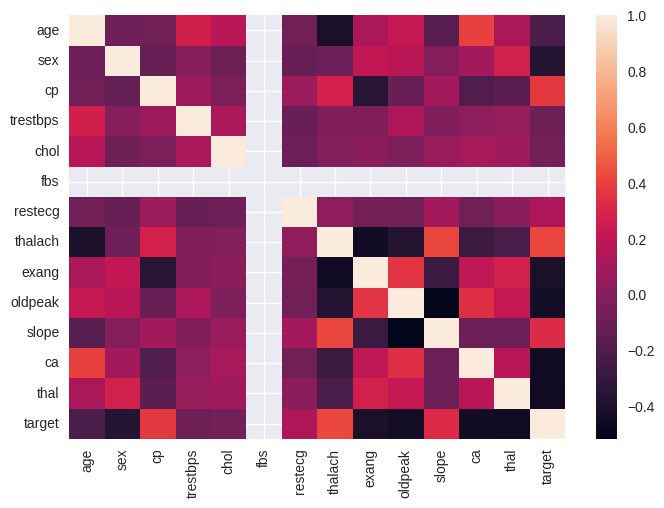

In [192]:
sns.heatmap(df.corr())

In [193]:
df['fbs'].unique()

array([0])

In [194]:
#  answer 2
# Split the data into features (X) and target (y)
X = df.drop(columns = ['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=423)

In [195]:
X_train.shape

(159, 13)

In [196]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

<Axes: >

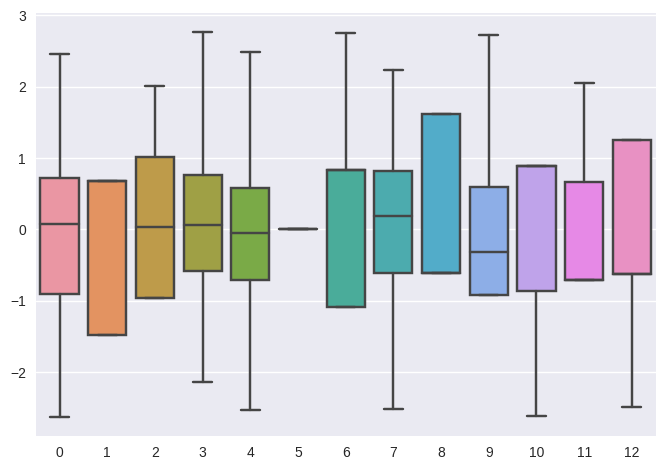

In [197]:
sns.boxplot(X_train_scaled)

In [198]:
# answer 3
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [199]:
# answer 4
from sklearn.metrics import accuracy_score
# Predict Testing data
y_pred =clf.predict(X_test)

# Get accuracy for test data prediction
test_model_score = accuracy_score(y_test,y_pred)
print(test_model_score)

0.855072463768116


In [200]:
from sklearn import metrics

# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.855072463768116
Precision: 0.8461538461538461
Recall: 0.8918918918918919
F1 Score: 0.868421052631579


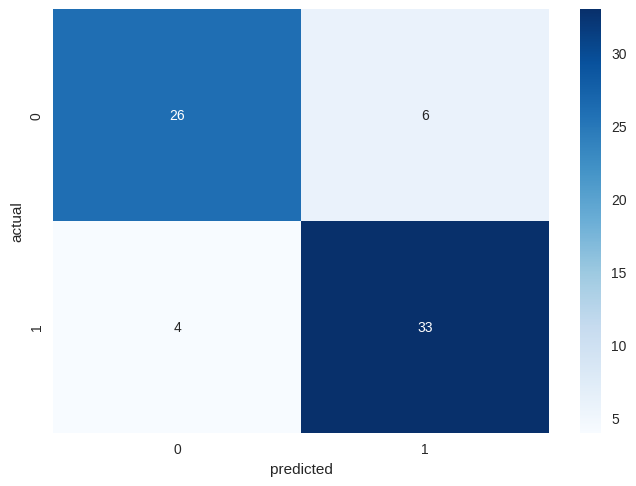

In [201]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [202]:
# answer 5
# most important faetures
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

mif=[]

# print the top 5 features
print("Top 5 features:")
for i in range(5):
    print("%d-> %s (%f)" % (i+1, X_train.columns[indices[i]], importances[indices[i]]))
    mif.append([X_train.columns[indices[i]],importances[indices[i]]])

Top 5 features:
1-> thal (0.147815)
2-> age (0.124834)
3-> ca (0.117306)
4-> oldpeak (0.109771)
5-> cp (0.106331)


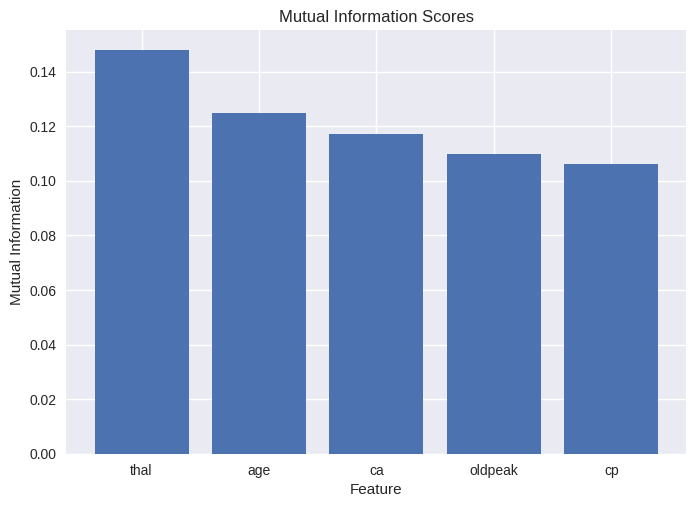

In [203]:
# top 5 features barplot
import matplotlib.pyplot as plt

# Create a list of the x-coordinates and y-coordinates
x = [item[0] for item in mif]
y = [item[1] for item in mif]

# Create the barplot
plt.bar(x, y)

# Add labels and a title
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information Scores')

# Show the plot
plt.show()

In [204]:
x

['thal', 'age', 'ca', 'oldpeak', 'cp']

In [205]:
# answer 6
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
        'n_estimators':[100,200,300],
        'criterion':['gini','entropy']
      }

In [206]:
from sklearn.model_selection import RandomizedSearchCV

In [207]:
cv=RandomizedSearchCV(clf,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.812 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.812 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.781 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.844 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.839 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.781 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.844 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.781 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.844 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.806 total time=  

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [208]:
cv.best_params_

{'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'}

In [209]:
clf_ = RandomForestClassifier(n_estimators= 300,max_depth=10,criterion='gini',random_state=0)
clf_.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)

In [210]:
y_pred_=clf_.predict(X_test)

In [215]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test, y_pred_)
precision = metrics.precision_score(y_test, y_pred_)
recall = metrics.recall_score(y_test, y_pred_)
f1_score = metrics.f1_score(y_test, y_pred_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8405797101449275
Precision: 0.825
Recall: 0.8918918918918919
F1 Score: 0.8571428571428571


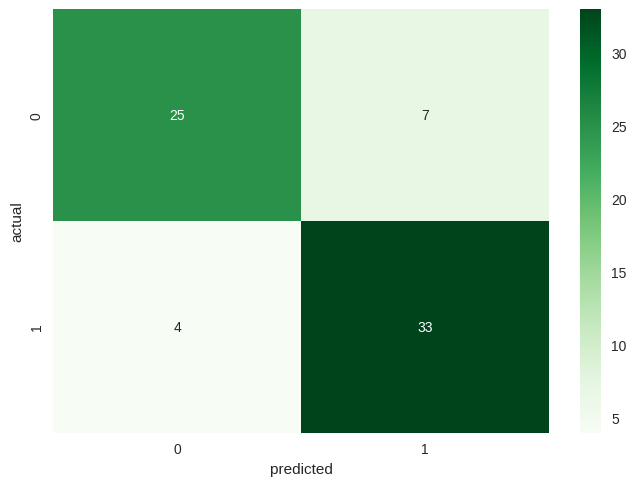

In [212]:
# Calculate the confusion matrix
confusion_matrix_ = metrics.confusion_matrix(y_test, y_pred_)

sns.heatmap(confusion_matrix_, annot=True, cmap="Greens", fmt="d")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [250]:
y_test.value_counts()

1    37
0    32
Name: target, dtype: int64

There is no change in recall/accuracy after the hyperparameter tuning and training the model on the best parameters.
The accuracy has a minor change and recall is 89.10%(whiich is important for this dataset).

# answer 8

In [231]:
# selecting top 2 features and training the model
X_train_2=X_train.loc[:,['age','thal']]
X_test_2=X_test.loc[:,['age','thal']]

# traning the model
clf_2 = RandomForestClassifier()
clf_2.fit(X_train_2, y_train)

# predicted points
y_pred_2=clf_2.predict(X_test_2)

# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test, y_pred_2)
precision = metrics.precision_score(y_test, y_pred_2)
recall = metrics.recall_score(y_test, y_pred_2)
f1_score = metrics.f1_score(y_test, y_pred_2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7246376811594203
Precision: 0.7368421052631579
Recall: 0.7567567567567568
F1 Score: 0.7466666666666667


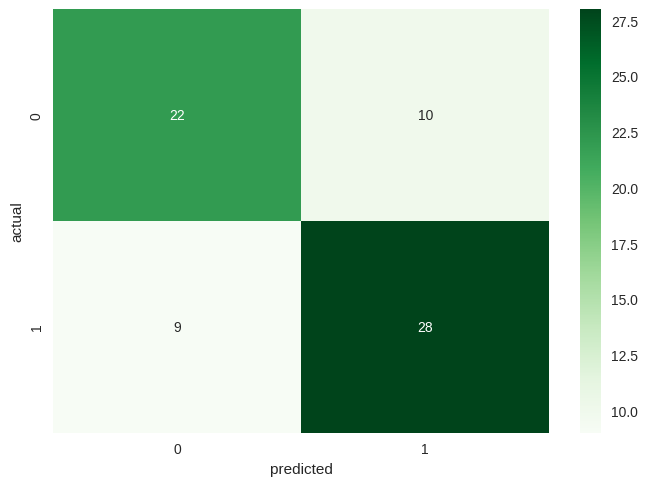

In [252]:
# Calculate the confusion matrix
confusion_matrix_ = metrics.confusion_matrix(y_test, y_pred_2)

sns.heatmap(confusion_matrix_, annot=True, cmap="Greens", fmt="d")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


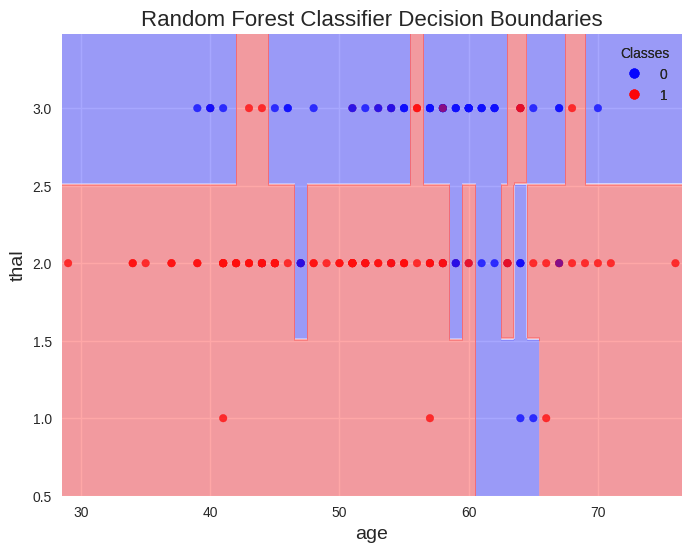

In [238]:
# Plot decision boundaries on a scatter plot of the two most important features
x_min, x_max = X_train_2['age'].min() - 0.5, X_train_2['age'].max() + 0.5
y_min, y_max = X_train_2['thal'].min() - 0.5, X_train_2['thal'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X_train_2['age'], X_train_2['thal'], c=y_train, cmap='bwr', alpha=0.8, s=30, marker='o')
ax.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')

plt.xlabel('age', fontsize=14)
plt.ylabel('thal', fontsize=14)
plt.title('Random Forest Classifier Decision Boundaries', fontsize=16)

legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)

plt.show()

In [247]:
df['target'].value_counts()

1    132
0     96
Name: target, dtype: int64

**Observeations**
- by using the most important two features for the random forst classifier algorithm, the model accuracy/recall dropped significantly. So, we can say that two feature are not enough to correctly predict the risk of heart disease.
- instead, bt hyperparameter tuning and using all the five feature the model's accuracy was the highest

**Limitations**
- the dataset is imbalanced, so the model did not train well, we need to handle it with resamplig, adjusting class weightds, ensemble techniques
- the datset is small with only 303 records
- the model is performing poorly on the 0 class (True Negative cases as the predicted counts were 25 while actual count was 32)
- the False Negative is important in this problem statement, so we need to decrease the false negative points and increase recall, but this model doesn't improve any further beyong 89.10% recall.